In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.animation as animation

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import SGDRegressor

In [2]:
data = pd.read_csv('../data/housing-data.csv')

In [3]:
data.head()

sqft  bdrms  age   price
0  2104      3   70  399900
1  1600      3   28  329900
2  2400      3   44  369000
3  1416      2   49  232000
4  3000      4   75  539900

In [4]:
X=data.sqft
Y=data.price

X = (X - X.mean()) / X.std()
X = np.c_[np.ones(X.shape[0]), X]

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=40)

In [5]:
#GRADIENT DESCENT

alpha = 0.01 #Step size
iterations = 2000 #No. of iterations
m = y_train.size #No. of data points
np.random.seed(123) #Set the seed
theta = np.random.rand(2) #Pick some random values to start with


#GRADIENT DESCENT
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

#Pass the relevant variables to the function and get the new values back...
past_thetas, past_costs = gradient_descent(X_train, y_train, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 328752.45, 105777.80


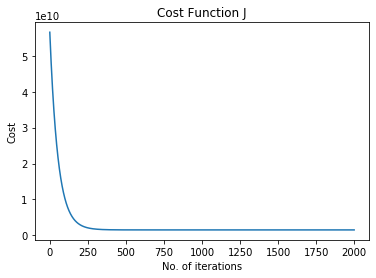

In [6]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [7]:
#Animation

#Set the plot up,
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(X_train[:,1], y_train, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

#Generate the animation data,
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = past_thetas[i][1]*x + past_thetas[i][0]
    line.set_data(x, y)
    annotation.set_text('Cost = %.2f e10' % (past_costs[i]/10000000000))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=0, blit=True)

anim.save('animation.gif', writer='imagemagick', fps = 30)

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.



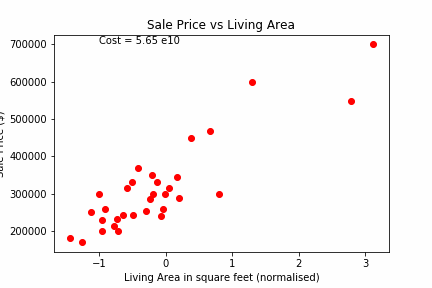

In [8]:
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

In [9]:
y_pred=np.dot(X_test,theta)

In [10]:
y_pred

array([222578.19789992, 238151.32707147, 253724.45624303, 404131.60123326,
       342504.60288771, 461765.48953483, 256519.63327382, 328661.82140188,
       381903.28865506, 355282.55502847, 480000.69206904, 313754.21057099,
       409721.95529485, 360340.49441752, 580227.75417315])

In [11]:
y_test.values

array([239500, 299900, 249900, 314000, 399900, 539900, 464500, 347000,
       369000, 475000, 579900, 255000, 499998, 329900, 573900],
      dtype=int64)

In [12]:
mse=mean_squared_error(y_test,y_pred)
mse

6818403464.582324

In [13]:
r2=r2_score(y_test,y_pred)
r2

0.48113581774710634

In [14]:
model=SGDRegressor(alpha=0.01,fit_intercept=False,max_iter=2000)

In [15]:
model.fit(X_train,y_train)

SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=False, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=2000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [16]:
y_pred1=model.predict(X_test)

In [17]:
mse=mean_squared_error(y_test,y_pred1)
mse

7151100664.415127

In [18]:
r2=r2_score(y_test,y_pred1)
r2

0.4558183572263612

In [19]:
model.coef_

array([324714.70661179, 103838.12615515])

In [20]:
theta

array([328752.44517593, 105777.79832925])